___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv("weather.csv")

In [3]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather[["TMIN", "TAVG", "TMAX"]].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


In [5]:
box_df = weather[["TMIN", "TAVG", "TMAX"]]

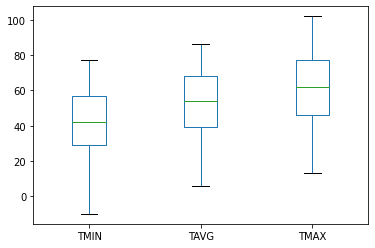

In [6]:
box_df.plot(kind="box")

plt.show()

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [7]:
weather["TDIFF"] = weather.TMAX - weather.TMIN

In [8]:
weather.TDIFF.describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

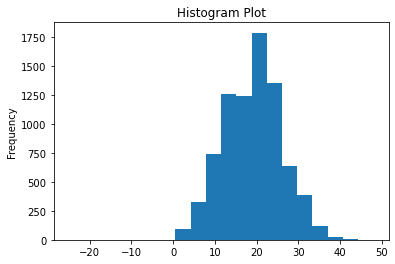

In [9]:
weather.TDIFF.plot(kind="hist",bins=20,title="Histogram Plot")

plt.show()

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [10]:
weather.head(2)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0


In [11]:
weather.iloc[:,6:26].head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
WT = weather.loc[:,"WT01":"WT22"]

In [13]:
WT.apply("sum", axis=1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8017    1.0
8018    0.0
8019    3.0
8020    2.0
8021    1.0
Length: 8022, dtype: float64

In [14]:
weather["bad_conditions"] = WT.apply("sum", axis=1)

In [15]:
weather.sample(3)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions
6832,USW00014765,2012-09-28,7.61,NaN,62.0,55.0,1.0,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,7.0,4.0
2849,USC00379423,2012-11-09,NaN,NaN,40.0,35.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0
2339,USC00379423,2011-06-14,NaN,NaN,68.0,54.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0


In [16]:
weather.bad_conditions

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8017    1.0
8018    0.0
8019    3.0
8020    2.0
8021    1.0
Name: bad_conditions, Length: 8022, dtype: float64

In [17]:
weather.bad_conditions.value_counts()

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [18]:
weather.bad_conditions.fillna(0, inplace=True)

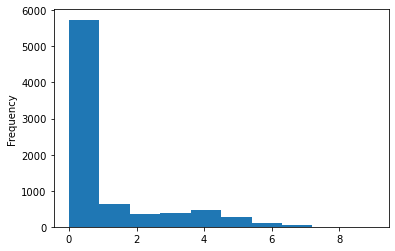

In [19]:
weather.bad_conditions.plot(kind="hist")

plt.show()

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [20]:
weather.bad_conditions.value_counts().sort_index()

0.0    5738
1.0     628
2.0     368
3.0     380
4.0     476
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [23]:
mapping = {0:"good", 1:"bad", 2:"bad", 3:"bad", 4:"bad", 5:"worse", 6:"worse", 7:"worse", 8:"worse", 9:"worse"}

In [24]:
weather["rating"] = weather.bad_conditions.map(mapping)

In [25]:
weather["rating"].unique()

array(['good', 'bad', 'worse'], dtype=object)

In [26]:
weather["rating"].value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [30]:
cats = ["good", "bad","worse"]

In [31]:
weather["rating"] = pd.Categorical(weather.rating, categories=cats, ordered=True)

In [32]:
weather.rating.sample(5)

4748     bad
594     good
4288     bad
2523    good
1096    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [33]:
ri = pd.read_csv("police.csv")

ri.drop(["county_name", "state"], axis=1, inplace=True)
ri = ri.dropna(subset=["driver_gender"])
ri["is_arrested"] = ri.is_arrested.astype("bool")

ri["combined"] = ri["stop_date"] + " " + ri["stop_time"]

ri["combined"] = pd.to_datetime(ri["combined"])

ri = ri.rename(columns={"combined":"stop_datetime"})

ri.set_index("stop_datetime", inplace=True)

C:\Users\erdem\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [34]:
ri = ri.reset_index()

In [35]:
weather_rating = weather[["DATE", "rating"]]

In [42]:
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [43]:
ri.shape

(480584, 25)

In [44]:
pd.merge(ri, weather_rating, how="left",left_on="stop_date", right_on="DATE")

,stop_datetime,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,good
1,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,bad
2,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,good
3,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,bad
4,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959947,2015-12-31 23:08:00,RI-2015-47063,2015-12-31,23:08,Zone X3,NaN,NaN,200,M,1980.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X3,2015-12-31,bad
959948,2015-12-31 23:44:00,RI-2015-47064,2015-12-31,23:44,Zone K2,NaN,NaN,900,M,1984.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K2,2015-12-31,good
959949,2015-12-31 23:44:00,RI-2015-47064,2015-12-31,23:44,Zone K2,NaN,NaN,900,M,1984.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K2,2015-12-31,bad
959950,2015-12-31 23:48:00,RI-2015-47065,2015-12-31,23:48,Zone K3,NaN,NaN,300,M,1988.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K3,2015-12-31,good


In [78]:
ri_weather = pd.merge(ri, weather_rating, how="left",left_on="stop_date", right_on="DATE")

In [79]:
ri_weather.shape

(959952, 27)

In [80]:
ri_weather.set_index("stop_datetime", inplace=True)

***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [81]:
ri_weather.is_arrested.value_counts()

False    926765
True      33187
Name: is_arrested, dtype: int64

In [82]:
ri_weather.is_arrested.mean()

0.0345715202426788

In [83]:
arrest = ri.is_arrested.mean()

In [84]:
ri_weather.head()

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,good
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,bad
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,good
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,bad
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,19.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04,good


In [85]:
ri_weather.groupby("rating")["is_arrested"].mean()

rating
good     0.034080
bad      0.035226
worse    0.039360
Name: is_arrested, dtype: float64

In [86]:
pd.DataFrame(ri_weather.groupby("rating")["is_arrested"].mean())

,is_arrested
rating,
good,0.034080
bad,0.035226
worse,0.039360


In [87]:
arrest

0.03454755048024903

In [88]:
ri_weather.violation.unique()

array(['Speeding', 'Equipment', 'Other', 'Moving violation',
       'Registration/plates', 'Seat belt'], dtype=object)

In [89]:
ri_weather.groupby(["rating", "violation"])["is_arrested"].mean()

rating  violation          
good    Equipment              0.059125
        Moving violation       0.056805
        Other                  0.080682
        Registration/plates    0.083238
        Seat belt              0.026339
        Speeding               0.013494
bad     Equipment              0.059581
        Moving violation       0.058081
        Other                  0.084950
        Registration/plates    0.092634
        Seat belt              0.028795
        Speeding               0.013348
worse   Equipment              0.094373
        Moving violation       0.062249
        Other                  0.058704
        Registration/plates    0.098673
        Seat belt              0.000000
        Speeding               0.016600
Name: is_arrested, dtype: float64

In [90]:
pd.DataFrame(ri_weather.groupby(["rating", "violation"])["is_arrested"].mean())

is_arrested
rating violation                       
good   Equipment               0.059125
       Moving violation        0.056805
       Other                   0.080682
       Registration/plates     0.083238
       Seat belt               0.026339
       Speeding                0.013494
bad    Equipment               0.059581
       Moving violation        0.058081
       Other                   0.084950
       Registration/plates     0.092634
       Seat belt               0.028795
       Speeding                0.013348
worse  Equipment               0.094373
       Moving violation        0.062249
       Other                   0.058704
       Registration/plates     0.098673
       Seat belt               0.000000
       Speeding                0.016600

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [60]:
arrest_rate = ri_weather.groupby(["rating", "violation"])["is_arrested"].mean()

In [61]:
arrest_rate

rating  violation          
good    Equipment              0.059125
        Moving violation       0.056805
        Other                  0.080682
        Registration/plates    0.083238
        Seat belt              0.026339
        Speeding               0.013494
bad     Equipment              0.059581
        Moving violation       0.058081
        Other                  0.084950
        Registration/plates    0.092634
        Seat belt              0.028795
        Speeding               0.013348
worse   Equipment              0.094373
        Moving violation       0.062249
        Other                  0.058704
        Registration/plates    0.098673
        Seat belt              0.000000
        Speeding               0.016600
Name: is_arrested, dtype: float64

In [62]:
arrest_rate.loc["bad","Moving violation"]

0.0580814717477004

In [63]:
arrest_rate.xs(key="Moving violation", level="violation")

rating
good     0.056805
bad      0.058081
worse    0.062249
Name: is_arrested, dtype: float64

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [95]:
arrest_rate.unstack(level="violation")

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
good,0.059125,0.056805,0.080682,0.083238,0.026339,0.013494
bad,0.059581,0.058081,0.084950,0.092634,0.028795,0.013348
worse,0.094373,0.062249,0.058704,0.098673,0.000000,0.016600


In [98]:
pd.pivot_table(ri_weather, index="rating", columns="violation",values="is_arrested")

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
good,0.059125,0.056805,0.080682,0.083238,0.026339,0.013494
bad,0.059581,0.058081,0.084950,0.092634,0.028795,0.013348
worse,0.094373,0.062249,0.058704,0.098673,0.000000,0.016600


In [99]:
pd.pivot_table(ri_weather, index="rating", columns="violation",values="is_arrested").T

rating,good,bad,worse
violation,,,
Equipment,0.059125,0.059581,0.094373
Moving violation,0.056805,0.058081,0.062249
Other,0.080682,0.084950,0.058704
Registration/plates,0.083238,0.092634,0.098673
Seat belt,0.026339,0.028795,0.000000
Speeding,0.013494,0.013348,0.016600
